# Chem 30324, Spring 2018, Homework 10


# Due April 25, 2018


## The two-state system.
### Consider a closed system containing $N$ objects, each of which can be in one of two energy states, of energy either 0 or $\varepsilon$. The total internal energy $U$ of the box is the sum of the energies of the individual objects.

![Boltzmann](imgs/Boltzmann.png)

### 1. Write down all the possible microstates for a box in which $N = 4$ and the internal energy $U = 2\varepsilon$.

$\Omega = \left(^4_2\right) = 6$

![](imgs/HW10.jpg)

### 2. What does the postulate of *equal a priori probabilities* say about the relative likelihood of occurance of any one of these microstates?

Given an isolated system in equilibrium, it is found with equal probability in each of it's accessible microstates

### 3. What is the entropy of the box? (Thank you, Ludwig Boltzmann.)

$\Omega = \left(^4_2\right) = 6$

$S = k_Bln\Omega = 2.474\times10^{-23} J/k$

### 4. Suppose two identical such boxes are brought into thermal contact and allowed to come to equilibrium. Calculate the change in internal energy $\Delta U$ and in entropy $\Delta S$ associated with this process.

$U_{initial} = 2\varepsilon + 2\varepsilon = 4\varepsilon = U_{final}$, so, $\Delta U = 0$.

$\Omega_{initial} = 6$, $S_{initial} = k_Bln6 + k_Bln6$.

$\Omega_{final} = \left(^8_4\right) = 70$, $S_{final} = k_Bln\Omega_{final} = k_Bln70$.

So, $\Delta S = k_Bln70 - 2k_Bln6 = 9.18\times10^{-24}J/k$.

## The canonical ensemble.
### The energy spectrum of some molecule is described by the diagram below.

![Energy States](imgs/EnergyStates.png)

### 5. Write the partition function $q$ for the molecular at thermal equilibrium at a temperature $\beta = 1/k_BT$.

$q = 1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}$

### 6. Plot the probability for the molecule to be in each of the three energy states vs. temperature. Be sure to indicate the probabilities in the limits of $T\rightarrow 0$ and $T \rightarrow \infty$.

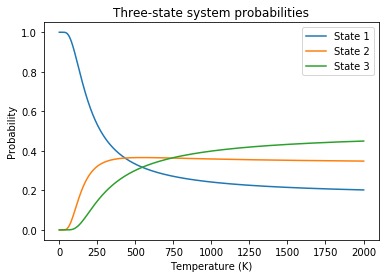

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.61734e-5   # eV /K
theta = 300.  # epsilon/kB


def q(T):
   return 1. + 2.*np.exp(-theta/T) + 3.*np.exp(-2.*theta/T)

def P1(T):
   return 1/q(T)

def P2(T):
   return 2.*np.exp(-theta/T)/q(T)
   
def P3(T):
   return 3.*np.exp(-2.*theta/T)/q(T)

T = np.linspace(1,2001,500)

plt.plot(T,P1(T),label='State 1')
plt.plot(T,P2(T),label='State 2')
plt.plot(T,P3(T),label='State 3')
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.legend()
plt.title('Three-state system probabilities')
plt.show()

|Probabilities|$T\rightarrow 0$|$T \rightarrow \infty$|
|-|-|-|
|$P(0)=\frac{1}{q}$|1|$\frac{1}{6}$|
|$P(\varepsilon)=\frac{2e^{-\beta\varepsilon}}{q}$|0|$\frac{2}{6}$|
|$P(2\varepsilon)=\frac{3e^{-2\beta\varepsilon}}{q}$|0|$\frac{3}{6}$|

### 7. Derive an expression for the energy $U$ per molecule by summing over the possible microstates weighted by their probabilities. Plot the average energy vs. temperature.

$U = 0P(0) + \varepsilon P(\varepsilon) + 2\varepsilon P(2\varepsilon) = \varepsilon\frac{2e^{-\beta\varepsilon}}{q} + 2\varepsilon\frac{3e^{-2\beta\varepsilon}}{q} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

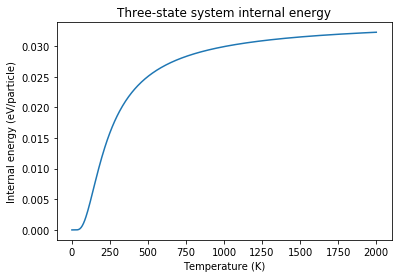

In [2]:
def U(T):
   epsilon = theta*k
   return (2.*epsilon * np.exp(-theta/T) + 6.*epsilon * np.exp(-2.*theta/T))/ q(T)
plt.plot(T,U(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Internal energy (eV/particle)')
plt.title('Three-state system internal energy')
plt.show()

### 8. Derive an expression for the energy $U$ per molecule by taking the appropriate derivative of the partition function from problem 5 (*Hint:* it is easier to work with the expressions in term of β than in $T$.) Does your result agree with that from problem 7?

$U = -\left(\frac{dlnq}{d\beta}\right) = -\frac{1}{q}\left(\frac{dq}{d\beta}\right) = -\frac{1}{q}\frac{d(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})}{d\beta} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

Yes, the result is the same as problem 7.

### 9. Derive an expression for the Helmholtz energy $A$ per molecule from the partition function. Plot $A$ vs. temperature, assuming $\varepsilon/k_B = 300$ K.

$A = U - TS = U - T(\frac{U}{T}+k_Blnq) = -k_BTlnq = -k_BTln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}) = -k_BTln(1 + 2e^{-300/T} + 3e^{-600/T})$

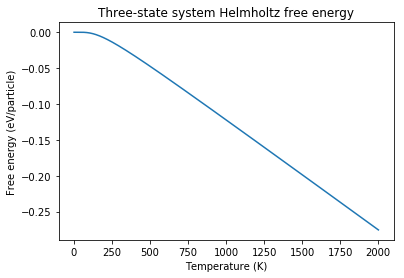

In [3]:
def A(T):
   return -k*T*np.log(q(T))
plt.plot(T,A(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Free energy (eV/particle)')
plt.title('Three-state system Helmholtz free energy')
plt.show()

### 10. Derive an expression for the entropy $S$ per molecules and plot vs. temperature, again assuming $\varepsilon/k_B = 300$ K.

$S = \frac{U-A}{T}= \frac{U}{T} + k_Blnq = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})T} + k_Bln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})$

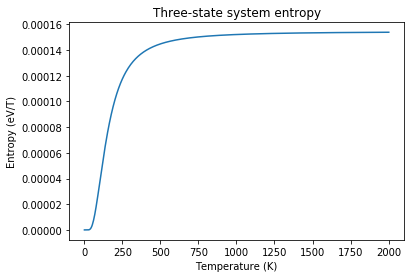

In [4]:
def S(T):
   return (U(T) - A(T))/T

plt.plot(T,S(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (eV/T)')
plt.title('Three-state system entropy')
plt.show()

### 11. In class we took the First Law as a postulate and demonstrated the Second Law. Look at your results for Problems 6 and 10. Can you use them to rationalize the Third Law? Explain your answer.

Yes. The entropy at absolute zero is equal to zero. From problem 6, we can get when T = 0 K, the molecule has the probability of 1 to be in the 0 energy state. $S(T = 0 K) = k_Bln(1) = 0$. From number 10, we can also get $S \rightarrow 0$ when $T\rightarrow 0$.

## Thermodynamics from scratch.
### Let’s calculate the thermodynamic properties of an ideal gas of CO molecules at 1 bar pressure. CO has a rotational constant B = 1.931 cm$^{-1}$ and vibrational frequency ν = 2156.6 cm$^{-1}$ . Suppose you have a 20 dm$^3$ cubic bottle containing 1 mole of CO gas that you can consider to behave ideally.

### 12. The characteristic temperature $\Theta$ of a particular degree of freedom is the characteristic quantum of energy for the degree of freedom divided by $k_B$ . Calculate the characteristic translational, rotational, and vibrational temperatures of CO.

$\theta_{trans} = \frac{\pi^2\hbar^2}{2mL^2k_B}$, $\theta_{rot} = hcB/k_B$, $\theta_{vib} = hc\tilde{\nu}/k_B$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05457e-34 # J*s
h = 6.62607e-34 # J*s
kB = 1.38065e-23 # J/K
m = 28.01*1.6605e-27 # kg/mol
V = 0.02 # m^3
c = 2.99792e10 # cm/s
B = 1.931 # cm^-1
v = 2156.6 # cm^-1

In [6]:
T_trans = np.pi**2*hbar**2/2/m/V**(2/3)/kB
T_rot = h*c*B/kB
T_vib = h*c*v/kB
print('T_trans = {0:.3e} K, T_rot = {1:.3f} K, T_vib = {2:0.2f} K.'.format(T_trans,T_rot,T_vib))

T_trans = 1.160e-18 K, T_rot = 2.778 K, T_vib = 3102.86 K.


### 13. Calculate the *translational partition function* of a CO molecule in the bottle at 298 K. What is the unit of the partition function?

For $T \gg \theta_{trans}$, $\Lambda \ll L$, $q_{trans} = V/\Lambda^3$. $\Lambda = h \left(\frac{\beta}{2\pi m}\right)^{1/2}$.

In [7]:
Lamda = h*(1/(kB*298*2*np.pi*m))**0.5
q_trans = V/Lamda**3
print('The translational partition function of a CO molecule in the bottle at 298 K is {:.4E}. It is dimensionless.'.format(q_trans))

The translational partition function of a CO molecule in the bottle at 298 K is 2.8662E+30. It is dimensionless.


### 14. Plot the *rotational and vibrational partition functions* of a CO molecule in the bottle from T = 200 to 2000 K (assume the CO remains a gas over the whole range). *Hint:* Use your answer to Problem 12 to simplify calculating the rotational partition function.

$q_{rot} = \frac{1}{\sigma}\frac{T}{\theta_{rot}} = \frac{T}{\theta_{rot}}$, $q_{vib} = \frac{1}{1-e^{-\theta_{vib}/T}}$

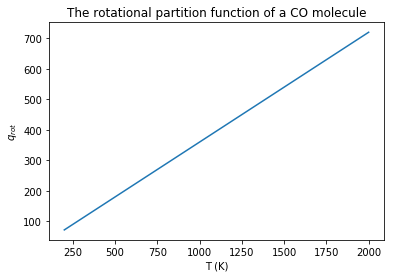

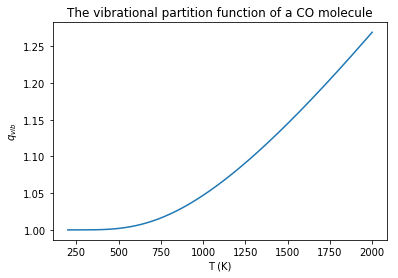

In [8]:
T = np.linspace(200,2000,1000) # r = R/a_0
q_rot = T/T_rot
q_vib = 1/(1-np.exp(-T_vib/T))
plt.plot(T,q_rot)
plt.xlabel('T (K)')
plt.ylabel('$q_{rot}$')
plt.title('The rotational partition function of a CO molecule')
plt.show()
plt.plot(T,q_vib)
plt.xlabel('T (K)')
plt.ylabel('$q_{vib}$')
plt.title('The vibrational partition function of a CO molecule')
plt.show()

### 15. Plot the *total translational, rotational, and vibrational energies* of CO in the bottle from T = 200 to 2000 K (assume the CO remains a gas over the whole range). Which (if any) of the three types of motions dominate the total energy?

$U_{trans} = \frac{3}{2}RT$, $U_{rot} = RT$, $U_{vib} = R\frac{\theta_{vib}}{e^{\theta_{vib}/T}-1}$.

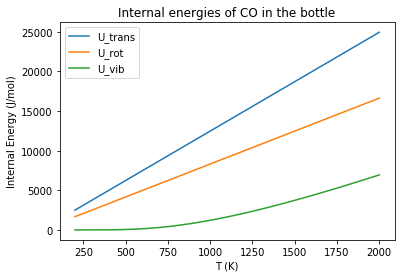

In [9]:
R = 8.31447 # J/(mol*K)
U_trans = 1.5*R*T
U_rot = R*T
U_vib = R*T_vib/(np.exp(T_vib/T)-1)
plt.plot(T,U_trans,label='U_trans')
plt.plot(T,U_rot,label='U_rot')
plt.plot(T,U_vib,label='U_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Internal Energy (J/mol)')
plt.title('Internal energies of CO in the bottle')
plt.show()

Translation dominates the total energy.

### 16. Plot the *total translational, rotational, and vibrational constant volume molar heat capacities* of CO in the bottle from T = 200 to 2000 K. Which (if any) of the three types of motions dominate the heat capacity?

$C_{V,trans} = \frac{3}{2}R$, $C_{V,rot} = R$, $C_{V,vib} = R\left(\frac{\theta_{vib}}{T}\frac{e^{\theta_{vib}/2T}}{e^{\theta_{vib}/T}-1}\right)^2$.

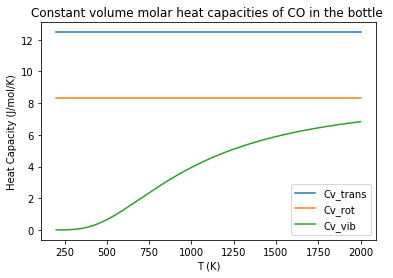

In [10]:
Cv_trans = np.linspace(1.5*R,1.5*R,1000)
Cv_rot = np.linspace(R,R,1000)
Cv_vib = R*(T_vib/T*np.exp(T_vib/2./T)/(np.exp(T_vib/T)-1))**2
plt.plot(T,Cv_trans,label='Cv_trans')
plt.plot(T,Cv_rot,label='Cv_rot')
plt.plot(T,Cv_vib,label='Cv_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Heat Capacity (J/mol/K)')
plt.title('Constant volume molar heat capacities of CO in the bottle ')
plt.show()

Translation dominates the heat capacity.

### 17. Plot the *total translational, rotational, and vibrational Helmholtz energies* of CO in the bottle from T = 200 to 2000 K. Which (if any) of the three types of motions dominate the Helmholtz energy?

$A = U - TS$, $S_{trans} = Rln\left(\frac{e^{5/2}V}{N\Lambda^3}\right)$, $S_{rot} = R(1-ln(\theta_{rot}/T))$, $S_{vib} = R\left(\frac{\theta_{vib}/T}{e^{\theta_{vib}/T}-1}-ln(1-e^{-\theta_{vib}/T})\right)$.

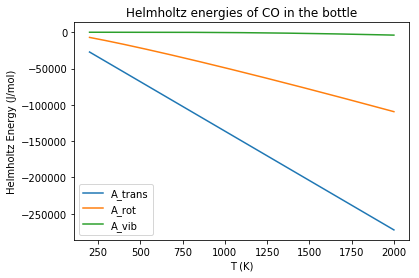

In [11]:
NA = 6.022e23
S_trans = R*np.log(np.exp(2.5)*V/NA/Lamda**3)
S_rot = R*(1-np.log(T_rot/T))
S_vib = R*(T_vib/T/(np.exp(T_vib/T)-1)-np.log(1-np.exp(-T_vib/T)))
A_trans = U_trans-T*S_trans
A_rot = U_rot-T*S_rot
A_vib = U_vib-T*S_vib
plt.plot(T,A_trans,label='A_trans')
plt.plot(T,A_rot,label='A_rot')
plt.plot(T,A_vib,label='A_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Helmholtz Energy (J/mol)')
plt.title('Helmholtz energies of CO in the bottle')
plt.show()

Translation dominates the Helmholtz energy.

### 18. Use your formulas to calculate $\Delta$P, $\Delta$U, $\Delta$A, and $\Delta$S associated with isothermally expanding the gas from 20 dm$^3$ to 40 dm$^3$.

T = 298 K. $\Delta U=0$. $\Delta P = \frac{RT}{V_2} - \frac{RT}{V_1}$. $\Delta S = S_{trans,2} - S_{trans,1}$. $A = U-TS$, so, $\Delta A = -T\Delta S$.

In [12]:
V2 = 0.04 # m^3
deltaP = R*298*(1/V2-1/V)
deltaS = R*np.log(np.exp(2.5)*V2/NA/Lamda**3) - R*np.log(np.exp(2.5)*V/NA/Lamda**3)
deltaA = -deltaS*298
print('Delta P = {0:.3f} Pa, Delta U = 0, Delta A = {1:.3f} J/mol, and Delta S = {2:.3f} J/mol/K.'.format(deltaP,deltaA,deltaS))

Delta P = -61942.801 Pa, Delta U = 0, Delta A = -1717.419 J/mol, and Delta S = 5.763 J/mol/K.
